## 예측 확률(prediction probability)을 이용한 불확실성 추정

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from tqdm import tqdm_notebook

In [4]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=0)

In [10]:
y_named = np.array(["blue", "red"])[y]

In [11]:
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

In [12]:
gbrt = GradientBoostingClassifier(random_state=0)

In [14]:
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [16]:
print("확률 값의 형태: {}".format(gbrt.predict_proba(X_test).shape))

확률 값의 형태: (25, 2)


In [18]:
'''
예측 확률을 이용하여 클래스별로 확률이 나옴
'''
GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named).predict_proba(X_test)

array([[0.86348552, 0.13651448],
       [0.00822134, 0.99177866],
       [0.98861097, 0.01138903],
       [0.98861097, 0.01138903],
       [0.00768625, 0.99231375],
       [0.98607544, 0.01392456],
       [0.99605913, 0.00394087],
       [0.01162614, 0.98837386],
       [0.80308933, 0.19691067],
       [0.00822134, 0.99177866],
       [0.5882493 , 0.4117507 ],
       [0.98401426, 0.01598574],
       [0.00768625, 0.99231375],
       [0.97544095, 0.02455905],
       [0.00768625, 0.99231375],
       [0.00822134, 0.99177866],
       [0.9982661 , 0.0017339 ],
       [0.99733304, 0.00266696],
       [0.06473556, 0.93526444],
       [0.00822134, 0.99177866],
       [0.96457662, 0.03542338],
       [0.01854417, 0.98145583],
       [0.00822134, 0.99177866],
       [0.02773617, 0.97226383],
       [0.97375262, 0.02624738]])

A Jupyter Widget

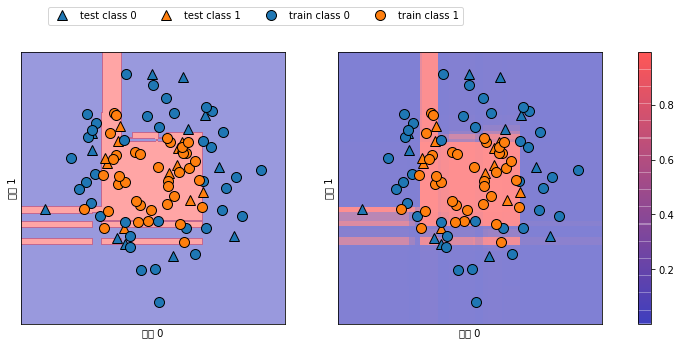

In [26]:
fig, axes = plt.subplots(1,2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=0.5, cm=mglearn.ReBl, function="predict_proba"
)

for ax in tqdm_notebook(axes):
    mglearn.discrete_scatter(X_test[:, 0], X_test[:,1], y_test, markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers="o", ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["test class 0", "test class 1", "train class 0", "train class 1"], ncol=4, loc=(.1, 1.1))
plt.show()